## a) Downloading the dataset

In [41]:
!pip3 install -U ucimlrepo 
from ucimlrepo import fetch_ucirepo
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, f1_score
from scipy.spatial.distance import mahalanobis
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
import seaborn as sns


In [42]:
vertebral_column = fetch_ucirepo(id=212) 

In [43]:
print(vertebral_column.variables) 


                       name     role         type demographic description  \
0          pelvic_incidence  Feature   Continuous        None        None   
1               pelvic_tilt  Feature   Continuous        None        None   
2     lumbar_lordosis_angle  Feature   Continuous        None        None   
3              sacral_slope  Feature   Continuous        None        None   
4             pelvic_radius  Feature   Continuous        None        None   
5  degree_spondylolisthesis  Feature   Continuous        None        None   
6                     class   Target  Categorical        None        None   

  units missing_values  
0  None             no  
1  None             no  
2  None             no  
3  None             no  
4  None             no  
5  None             no  
6  None             no  


In [44]:
print(vertebral_column)

{'data': {'ids': None, 'features':      pelvic_incidence  pelvic_tilt  lumbar_lordosis_angle  sacral_slope  \
0           63.027817    22.552586              39.609117     40.475232   
1           39.056951    10.060991              25.015378     28.995960   
2           68.832021    22.218482              50.092194     46.613539   
3           69.297008    24.652878              44.311238     44.644130   
4           49.712859     9.652075              28.317406     40.060784   
..                ...          ...                    ...           ...   
305         47.903565    13.616688              36.000000     34.286877   
306         53.936748    20.721496              29.220534     33.215251   
307         61.446597    22.694968              46.170347     38.751628   
308         45.252792     8.693157              41.583126     36.559635   
309         33.841641     5.073991              36.641233     28.767649   

     pelvic_radius  degree_spondylolisthesis  
0        98.67291

In [45]:
type(vertebral_column)


ucimlrepo.dotdict.dotdict

## pre processing and exploratory data analysis

Let's first make scatterplots of the independent variables in the dataset by using color to show Classes 0 and 1

In [46]:
data = vertebral_column.data.features 
target = vertebral_column.data.targets


In [47]:
target = target.replace({"Normal": 0, "Hernia": 1, "Spondylolisthesis": 1})

/var/folders/dt/88bkk7l10237tmcpdj06_5tm0000gn/T/ipykernel_4725/635630869.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  target = target.replace({"Normal": 0, "Hernia": 1, "Spondylolisthesis": 1})


In [48]:
print(target)

     class
0        1
1        1
2        1
3        1
4        1
..     ...
305      0
306      0
307      0
308      0
309      0

[310 rows x 1 columns]


In [49]:
data["Class"] = target

In [50]:
print(data["Class"].unique())

[1 0]


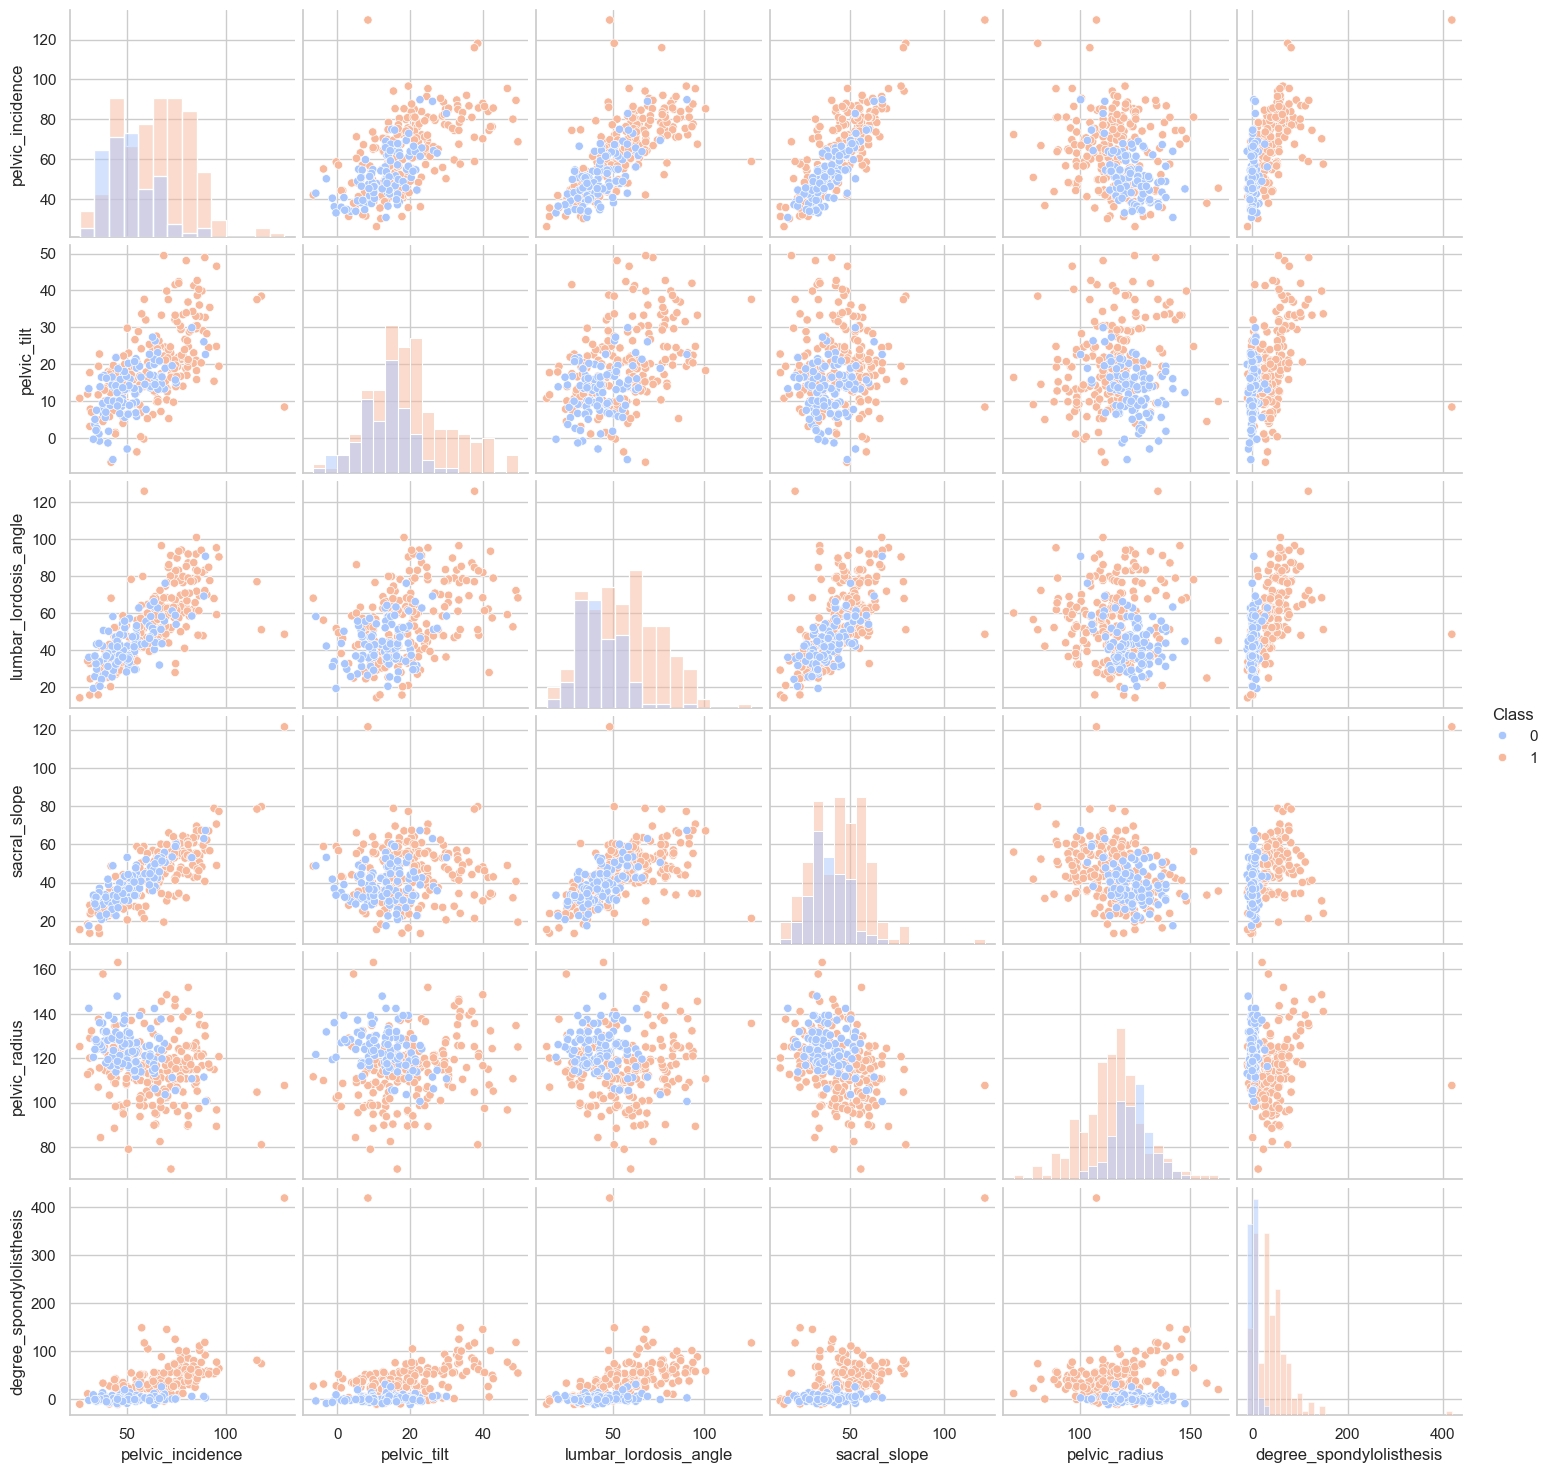

In [51]:
sns.pairplot(data, hue="Class", diag_kind="hist", palette="coolwarm");


In [52]:
print(data)


     pelvic_incidence  pelvic_tilt  lumbar_lordosis_angle  sacral_slope  \
0           63.027817    22.552586              39.609117     40.475232   
1           39.056951    10.060991              25.015378     28.995960   
2           68.832021    22.218482              50.092194     46.613539   
3           69.297008    24.652878              44.311238     44.644130   
4           49.712859     9.652075              28.317406     40.060784   
..                ...          ...                    ...           ...   
305         47.903565    13.616688              36.000000     34.286877   
306         53.936748    20.721496              29.220534     33.215251   
307         61.446597    22.694968              46.170347     38.751628   
308         45.252792     8.693157              41.583126     36.559635   
309         33.841641     5.073991              36.641233     28.767649   

     pelvic_radius  degree_spondylolisthesis  Class  
0        98.672917                 -0.254400 

In [53]:
print(target)

     class
0        1
1        1
2        1
3        1
4        1
..     ...
305      0
306      0
307      0
308      0
309      0

[310 rows x 1 columns]


### Now let's make boxplots for each of the independent variables. Use color to show Classes 0 

Text(0, 0.5, 'biomechanical attributes')

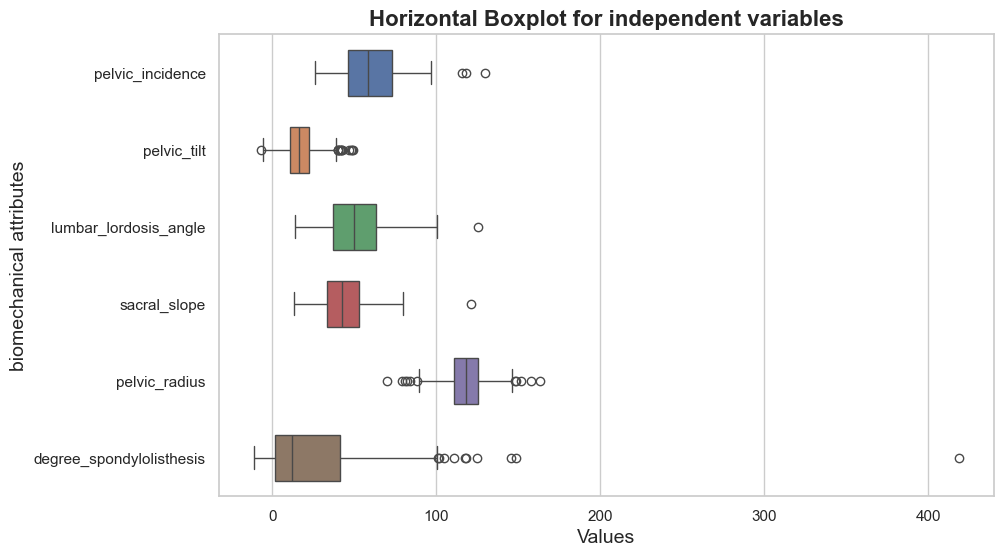

In [54]:
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))

sns.boxplot(data = data.loc[:, 'pelvic_incidence':'degree_spondylolisthesis'], orient = 'h', width=0.6)
plt.title("Horizontal Boxplot for independent variables", fontsize=16, weight='bold')
plt.xlabel("Values", fontsize=14)
plt.ylabel("biomechanical attributes", fontsize=14)

### As we need to split train/test data let's select the first 70 rows of Class 0 and the  first 140 rows of Class 1 as the training set and the rest of the data as the test set.

In [55]:
normal = data[data['Class'] == 0]
abnormal= data[data['Class'] == 1]

In [56]:
train_class_normal = normal.head(70)
train_class_abnormal = abnormal.head(140)

In [57]:
train_set = pd.concat([train_class_normal, train_class_abnormal])


In [58]:
test_class_normal = normal.iloc[70:]
test_class_abnormal = abnormal.iloc[140:]


test_set = pd.concat([test_class_normal, test_class_abnormal])

In [59]:
print(train_set)

     pelvic_incidence  pelvic_tilt  lumbar_lordosis_angle  sacral_slope  \
210         38.505273    16.964297              35.112814     21.540976   
211         54.920858    18.968430              51.601455     35.952428   
212         44.362490     8.945435              46.902096     35.417055   
213         48.318931    17.452121              48.000000     30.866809   
214         45.701789    10.659859              42.577846     35.041929   
..                ...          ...                    ...           ...   
135         77.121344    30.349874              77.481083     46.771470   
136         88.024499    39.844669              81.774473     48.179830   
137         83.396606    34.310989              78.423293     49.085617   
138         72.054034    24.700737              79.874016     47.353297   
139         85.095503    21.069897              91.734792     64.025606   

     pelvic_radius  degree_spondylolisthesis  Class  
210     127.632875                  7.986683 

In [60]:
print(test_set)

     pelvic_incidence  pelvic_tilt  lumbar_lordosis_angle  sacral_slope  \
280         50.086153    13.430044              34.457541     36.656108   
281         64.261507    14.497866              43.902504     49.763642   
282         53.683380    13.447022              41.584297     40.236358   
283         48.995958    13.113820              51.873520     35.882137   
284         59.167612    14.562749              43.199158     44.604863   
..                ...          ...                    ...           ...   
205         80.111572    33.942432              85.101608     46.169139   
206         95.480229    46.550053              59.000000     48.930176   
207         74.094731    18.823727              76.032156     55.271004   
208         87.679087    20.365613              93.822416     67.313473   
209         48.259920    16.417462              36.329137     31.842457   

     pelvic_radius  degree_spondylolisthesis  Class  
280     119.134622                  3.089484 

## Applying K Nearest Neighbors to classify

### Let's use Euclidean distance first

In [61]:
X_train = train_set.loc[:, 'pelvic_incidence':'degree_spondylolisthesis'].values
y_train = train_set['Class']

X_test = test_set.loc[:, 'pelvic_incidence':'degree_spondylolisthesis'].values
y_test = test_set['Class']

k_values = list(range(208,3,-3))

train_errors = []
test_errors = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors = k, metric = "euclidean")
    knn.fit(X_train, y_train)
    y_train_pred = knn.predict(X_train)
    y_test_pred = knn.predict(X_test)

    train_error = 1 - accuracy_score(y_train, y_train_pred)
    test_error = 1 - accuracy_score(y_test, y_test_pred)

    train_errors.append(train_error)
    test_errors.append(test_error)





    

### Plotting train and test errors in terms of k for k in 208; 205; : : : ; 7; 4; 1; g (in reverse order). Let's also calculate the confusion matrix, true positive rate, true negative rate, precision, and F1-score when k = k

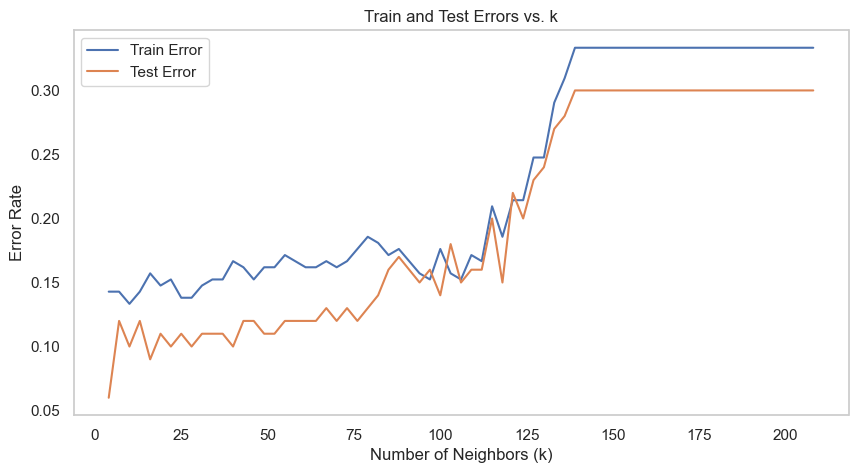

In [62]:
plt.figure(figsize = (10,5))
plt.plot(k_values, train_errors, label = 'Train Error')
plt.plot(k_values, test_errors, label = 'Test Error')

plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Error Rate')
plt.title('Train and Test Errors vs. k')
plt.legend()
plt.grid()
plt.show()


In [63]:
print(min(train_errors))


0.1333333333333333


### Lets select k = 25, which is the point where the test error decreases before increasing drastically

In [64]:
knn = KNeighborsClassifier(n_neighbors = 25, metric = "euclidean")


knn.fit(X_train, y_train)
y_test_pred = knn.predict(X_test)

tn, fp, fn, tp = confusion_matrix(y_test, y_test_pred).ravel()



tpr = tp / (tp + fn) 
tnr = tn / (tn + fp) 
precision = precision_score(y_test, y_test_pred)
f1 = f1_score(y_test, y_test_pred)


print(f"Confusion Matrix:\n{confusion_matrix(y_test, y_test_pred)}")
print(f"True Positive Rate (TPR/Recall): {tpr:.4f}")
print(f"True Negative Rate (TNR): {tnr:.4f}")
print(f"Precision: {precision:.4f}")
print(f"F1-score: {f1:.4f}")

Confusion Matrix:
[[20 10]
 [ 1 69]]
True Positive Rate (TPR/Recall): 0.9857
True Negative Rate (TNR): 0.6667
Precision: 0.8734
F1-score: 0.9262


### finding the best test error rate when the size of training set is 10; 20; 30 ... 210. For each N, training set will be the  first N/3 rows of Class 0 and the  first N - N/3 rows of Class 1. for each N, we'll select the optimal k from a set starting from k = 1, increasing by 5. For example, if N = 200, the optimal k is selected from f1; 6; 11; : : : ; 196g.

In [65]:
train_class_normal = normal.head(70)
train_class_abnormal = abnormal.head(140)

train_set = pd.concat([train_class_normal, train_class_abnormal])

test_class_normal = normal.iloc[70:]
test_class_abnormal = abnormal.iloc[140:]


test_set = pd.concat([test_class_normal, test_class_abnormal])


X_train = train_set.loc[:, 'pelvic_incidence':'degree_spondylolisthesis'].values
y_train = train_set['Class']

X_test = test_set.loc[:, 'pelvic_incidence':'degree_spondylolisthesis'].values
y_test = test_set['Class']

k_values = list(range(208,3,-3))

train_errors = []
test_errors = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors = k, metric = "euclidean")
    knn.fit(X_train, y_train)
    y_train_pred = knn.predict(X_train)
    y_test_pred = knn.predict(X_test)

    train_error = 1 - accuracy_score(y_train, y_train_pred)
    test_error = 1 - accuracy_score(y_test, y_test_pred)

    train_errors.append(train_error)
    test_errors.append(test_error)


In [66]:

N_values = list(range(10,211,10))

best_test_errors = []
best_train_errors = []

for N in N_values:
    train_class_normal = normal.head(N//3)
    train_class_abnormal = abnormal.head(N-(N//3))
    train_set = pd.concat([train_class_normal, train_class_abnormal])

    X_train = train_set.loc[:, 'pelvic_incidence':'degree_spondylolisthesis'].values
    y_train = train_set['Class']

    
    X_test = test_set.loc[:, 'pelvic_incidence':'degree_spondylolisthesis'].values
    y_test = test_set['Class']

    
    k_values = list(range(1, min(N, 200), 5))
    
    test_errors = []
    train_errors = []

    for k in k_values:
        knn = KNeighborsClassifier(n_neighbors=k, metric="euclidean")
        knn.fit(X_train, y_train)
        y_test_pred = knn.predict(X_test)
        y_train_pred = knn.predict(X_train)

        test_error = 1 - accuracy_score(y_test, y_test_pred)
        train_error = 1 - accuracy_score(y_train,y_train_pred)
        
        test_errors.append(test_error)
        train_errors.append(train_error)
    #print(train_errors)

    
    best_test_errors.append(min(test_errors))
    best_train_errors.append(min(train_errors))
    


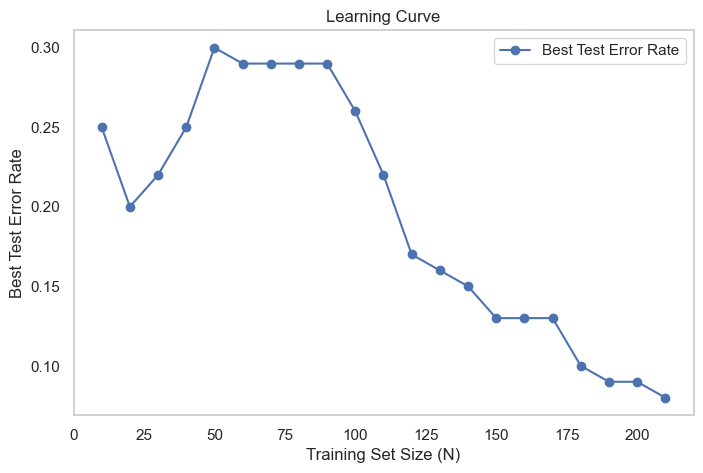

In [67]:
#plotting the learning curve 
plt.figure(figsize=(8, 5))
plt.plot(N_values, best_test_errors, marker='o', linestyle='-', label='Best Test Error Rate')

plt.xlabel('Training Set Size (N)')
plt.ylabel('Best Test Error Rate')
plt.title('Learning Curve')
plt.legend()
plt.grid()
plt.show()

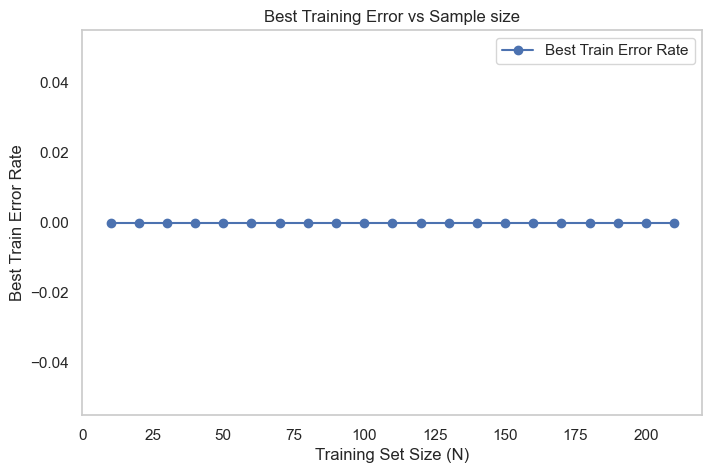

In [68]:
plt.figure(figsize=(8, 5))
plt.plot(N_values, best_train_errors, marker='o', linestyle='-', label='Best Train Error Rate')

plt.xlabel('Training Set Size (N)')
plt.ylabel('Best Train Error Rate')
plt.title('Best Training Error vs Sample size')
plt.legend()
plt.grid()
plt.show()

### It is expected to have a training error of 0 when k = 1 no matter what the N is -> (overfitting)

## Now we have results with Euclidean metric, let's change it and analyze the results

### Minkowski Distance, which becomes Manhattan Distance with p = 1.

In [69]:

X_train = train_set.loc[:, 'pelvic_incidence':'degree_spondylolisthesis'].values
y_train = train_set['Class']

X_test = test_set.loc[:, 'pelvic_incidence':'degree_spondylolisthesis'].values
y_test = test_set['Class']

k_values = list(range(1, 197, 5))


test_errors = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k, metric="minkowski", p=1) 
    knn.fit(X_train, y_train)
    y_test_pred = knn.predict(X_test)

    test_error = 1 - accuracy_score(y_test, y_test_pred)
    test_errors.append(test_error)


results_df = pd.DataFrame({"k": k_values, "Test Error": test_errors})


print(results_df)


      k  Test Error
0     1        0.11
1     6        0.11
2    11        0.11
3    16        0.12
4    21        0.12
5    26        0.11
6    31        0.12
7    36        0.13
8    41        0.13
9    46        0.13
10   51        0.14
11   56        0.13
12   61        0.15
13   66        0.15
14   71        0.14
15   76        0.14
16   81        0.16
17   86        0.15
18   91        0.20
19   96        0.20
20  101        0.22
21  106        0.21
22  111        0.23
23  116        0.21
24  121        0.22
25  126        0.24
26  131        0.28
27  136        0.28
28  141        0.30
29  146        0.30
30  151        0.30
31  156        0.30
32  161        0.30
33  166        0.30
34  171        0.30
35  176        0.30
36  181        0.30
37  186        0.30
38  191        0.30
39  196        0.30


In [70]:

log10_p_values = np.arange(0.1, 1.1, 0.1)  
p_values = 10 ** log10_p_values  


test_errors = []


k = 26

for p in p_values:
    knn = KNeighborsClassifier(n_neighbors=k, metric="minkowski", p=p)
    knn.fit(X_train, y_train)
    y_test_pred = knn.predict(X_test)

    test_error = 1 - accuracy_score(y_test, y_test_pred)
    test_errors.append(test_error)


results_df = pd.DataFrame({"log10(p)": log10_p_values, "p": p_values, "Test Error": test_errors})


best_index = results_df["Test Error"].idxmin()
best_log10_p = results_df.loc[best_index, "log10(p)"]
best_p = results_df.loc[best_index, "p"]
best_test_error = results_df.loc[best_index, "Test Error"]



print(results_df)




   log10(p)          p  Test Error
0       0.1   1.258925        0.10
1       0.2   1.584893        0.10
2       0.3   1.995262        0.11
3       0.4   2.511886        0.10
4       0.5   3.162278        0.11
5       0.6   3.981072        0.10
6       0.7   5.011872        0.11
7       0.8   6.309573        0.11
8       0.9   7.943282        0.11
9       1.0  10.000000        0.11


## chebyshev distance 

In [71]:
k_values = list(range(1, 197, 5))


test_errors = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k, metric="chebyshev") 
    knn.fit(X_train, y_train)
    y_test_pred = knn.predict(X_test)

    test_error = 1 - accuracy_score(y_test, y_test_pred)
    test_errors.append(test_error)


results_df = pd.DataFrame({"k": k_values, "Test Error": test_errors})


print(results_df)

      k  Test Error
0     1        0.13
1     6        0.10
2    11        0.12
3    16        0.08
4    21        0.11
5    26        0.12
6    31        0.12
7    36        0.10
8    41        0.13
9    46        0.12
10   51        0.12
11   56        0.12
12   61        0.14
13   66        0.13
14   71        0.14
15   76        0.11
16   81        0.14
17   86        0.12
18   91        0.15
19   96        0.14
20  101        0.19
21  106        0.18
22  111        0.18
23  116        0.18
24  121        0.21
25  126        0.21
26  131        0.25
27  136        0.28
28  141        0.30
29  146        0.30
30  151        0.30
31  156        0.30
32  161        0.30
33  166        0.30
34  171        0.30
35  176        0.30
36  181        0.30
37  186        0.30
38  191        0.30
39  196        0.30


####  Mahalanobis Distance.

In [72]:
cov_matrix = np.cov(X_train, rowvar=False)

inv_cov_matrix = np.linalg.pinv(cov_matrix)


k_values = list(range(1, 197, 5))
test_errors = []


for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k, metric="mahalanobis", metric_params={"VI": inv_cov_matrix}) 
    knn.fit(X_train, y_train)
    y_test_pred = knn.predict(X_test)

    test_error = 1 - accuracy_score(y_test, y_test_pred)
    test_errors.append(test_error)


results_df = pd.DataFrame({"k": k_values, "Test Error": test_errors})


print(results_df)


      k  Test Error
0     1        0.15
1     6        0.16
2    11        0.18
3    16        0.17
4    21        0.20
5    26        0.17
6    31        0.21
7    36        0.21
8    41        0.19
9    46        0.22
10   51        0.21
11   56        0.21
12   61        0.23
13   66        0.21
14   71        0.22
15   76        0.21
16   81        0.24
17   86        0.21
18   91        0.24
19   96        0.24
20  101        0.24
21  106        0.23
22  111        0.25
23  116        0.26
24  121        0.29
25  126        0.29
26  131        0.30
27  136        0.30
28  141        0.30
29  146        0.30
30  151        0.30
31  156        0.30
32  161        0.30
33  166        0.30
34  171        0.30
35  176        0.30
36  181        0.30
37  186        0.30
38  191        0.30
39  196        0.30


### The majority polling decision can be replaced by weighted decision, in which the weight of each point in voting is inversely proportional to its distance from the query/test data point. In this case, closer neighbors of a query point will have a greater influence than neighbors which are further away. Let's use weighted voting with Euclidean, Manhattan, and Chebyshev distances and report the best test errors when k 2 f1; 6; 11; 16; : : : ; 196g.

In [73]:
k_values = list(range(1, 197, 5))

distance_metrics = ["euclidean", "manhattan", "chebyshev"]

results = {metric: [] for metric in distance_metrics}

for metric in distance_metrics:
    test_errors = []
    
    
    for k in k_values:
        knn = KNeighborsClassifier(n_neighbors=k, metric=metric, weights="distance")  
        knn.fit(X_train, y_train)
        y_test_pred = knn.predict(X_test)

        test_error = 1 - accuracy_score(y_test, y_test_pred)
        test_errors.append(test_error)

    results[metric] = test_errors  


results_df = pd.DataFrame({"k": k_values, 
                           "Euclidean Test Error": results["euclidean"], 
                           "Manhattan Test Error": results["manhattan"], 
                           "Chebyshev Test Error": results["chebyshev"]})


print(results_df)


best_results = results_df.iloc[:, 1:].min()
print("\nBest Test Errors:")
print(best_results)


      k  Euclidean Test Error  Manhattan Test Error  Chebyshev Test Error
0     1                  0.13                  0.11                  0.13
1     6                  0.10                  0.11                  0.13
2    11                  0.12                  0.11                  0.12
3    16                  0.11                  0.12                  0.11
4    21                  0.11                  0.11                  0.12
5    26                  0.11                  0.10                  0.12
6    31                  0.11                  0.11                  0.11
7    36                  0.11                  0.11                  0.11
8    41                  0.11                  0.11                  0.11
9    46                  0.11                  0.11                  0.12
10   51                  0.11                  0.12                  0.12
11   56                  0.11                  0.12                  0.12
12   61                  0.11         

Lowest training rate is 0 no matter we are using the full sample or any N, because in case of k=1 the training error is 0